# Ibis MapD/OmniSci Window Operations

The PR [#1771](https://github.com/ibis-project/ibis/pull/1771) added support to window operations into Ibis MapD/OmniSci backend.

The first operations available are:

- lag
- firstvalue
- lead
- lastvalue
- mean
- min
- max
- sum

In [1]:
import ibis
import pandas as pd

In [2]:
db_conf = dict(
    host='localhost', port='6274', 
    user='mapd', password='HyperInteractive', 
    database='ibis_testing'
)

def make_mapd_connection(db_conf):
    return ibis.mapd.connect(**db_conf)

mapd = make_mapd_connection(db_conf)

In [3]:
# show database version
mapd.con._client.get_version()

'4.6.1-20190501-1937c23915'

In [4]:
mapd.list_tables()

['diamonds', 'batting', 'awards_players', 'functional_alltypes', 'geo']

In [5]:
t = mapd.table('functional_alltypes')
win = ibis.window(
    following=0,
    group_by=[t.string_col],
    order_by=[t.id],
)

## lag

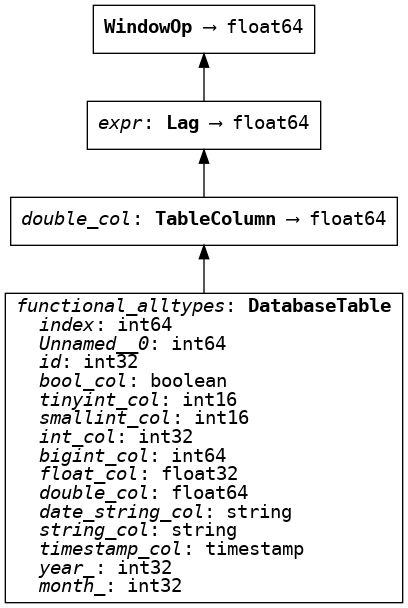

SELECT lag("double_col") OVER (PARTITION BY "string_col" ORDER BY "id") AS tmp
FROM functional_alltypes


0     0.0
1    10.1
2    20.2
3    30.3
4    40.4
Name: tmp, dtype: float64

In [6]:
expr = t.double_col.lag().over(win)
display(expr)
print(expr.compile())
expr.execute().head(5)

# firstvalue

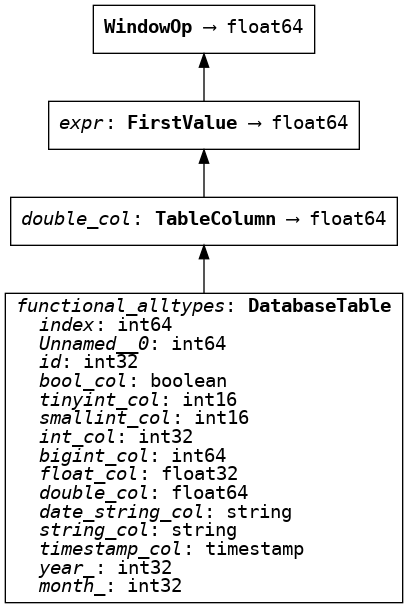

SELECT first_value("double_col") OVER (PARTITION BY "string_col" ORDER BY "id") AS tmp
FROM functional_alltypes


0     0.0
1    10.1
2    20.2
3    30.3
4    40.4
Name: tmp, dtype: float64

In [7]:
expr = t.double_col.first().over(win)
display(expr)
print(expr.compile())
expr.execute().head(5)

## lead

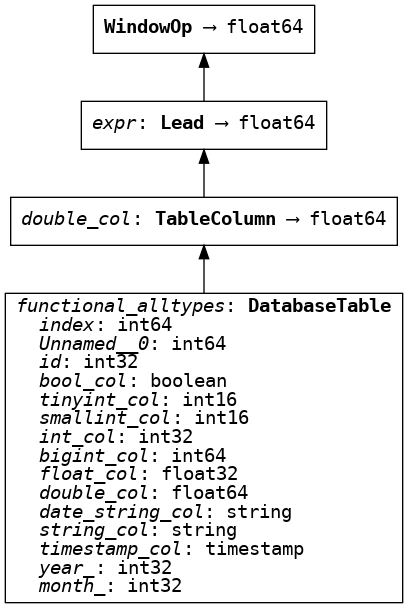

SELECT lead("double_col") OVER (PARTITION BY "string_col" ORDER BY "id") AS tmp
FROM functional_alltypes


0     0.0
1    10.1
2    20.2
3    30.3
4    40.4
Name: tmp, dtype: float64

In [8]:
expr = t.double_col.lead().over(win)
display(expr)
print(expr.compile())
expr.execute().head(5)

## lastvalue

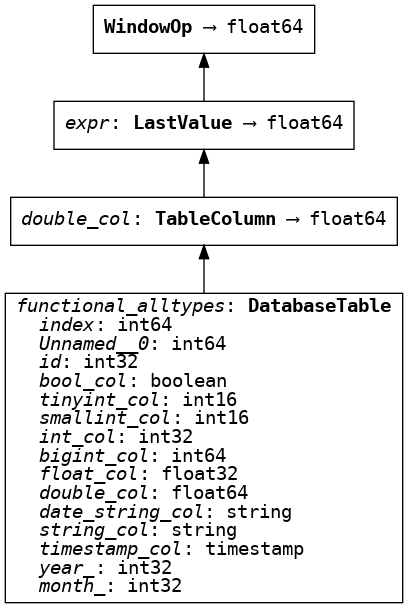

SELECT last_value("double_col") OVER (PARTITION BY "string_col" ORDER BY "id") AS tmp
FROM functional_alltypes


0     0.0
1    10.1
2    20.2
3    30.3
4    40.4
Name: tmp, dtype: float64

In [9]:
expr = t.double_col.last().over(win)
display(expr)
print(expr.compile())
expr.execute().head(5)

## mean

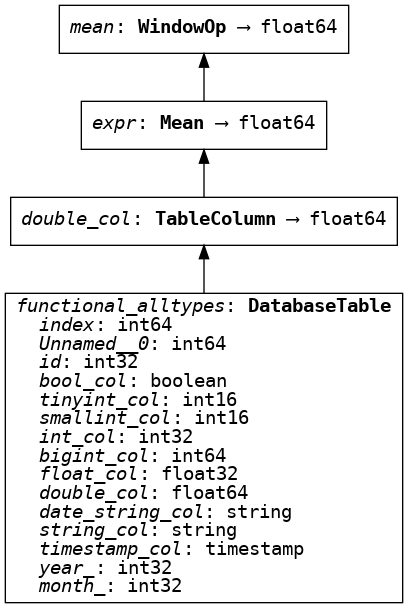

SELECT avg("double_col") OVER (PARTITION BY "string_col" ORDER BY "id") AS tmp
FROM functional_alltypes


0     0.0
1    10.1
2    20.2
3    30.3
4    40.4
Name: tmp, dtype: float64

In [10]:
expr = t.double_col.mean().over(win)
display(expr)
print(expr.compile())
expr.execute().head(5)

## min

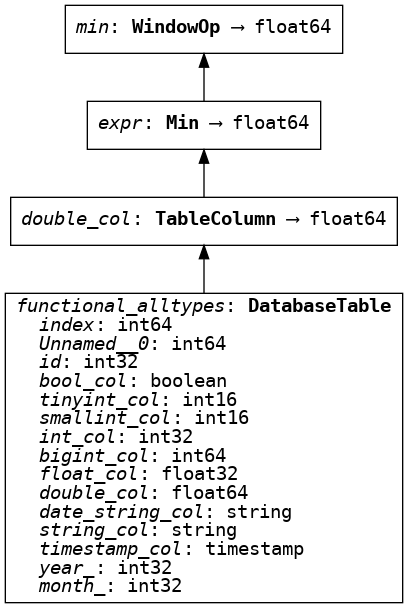

SELECT min("double_col") OVER (PARTITION BY "string_col" ORDER BY "id") AS tmp
FROM functional_alltypes


0     0.0
1    10.1
2    20.2
3    30.3
4    40.4
Name: tmp, dtype: float64

In [11]:
expr = t.double_col.min().over(win)
display(expr)
print(expr.compile())
expr.execute().head(5)

## max

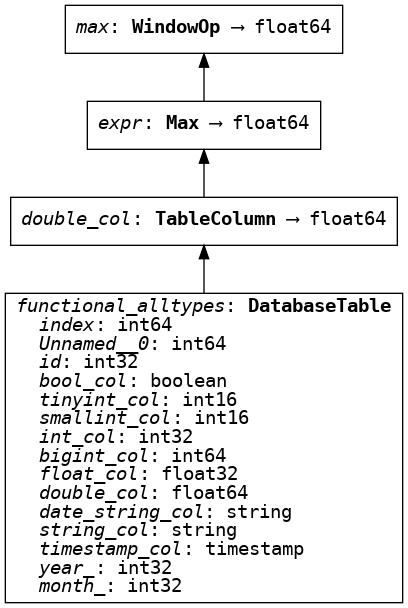

SELECT max("double_col") OVER (PARTITION BY "string_col" ORDER BY "id") AS tmp
FROM functional_alltypes


0     0.0
1    10.1
2    20.2
3    30.3
4    40.4
Name: tmp, dtype: float64

In [12]:
expr = t.double_col.max().over(win)
display(expr)
print(expr.compile())
expr.execute().head(5)

## sum

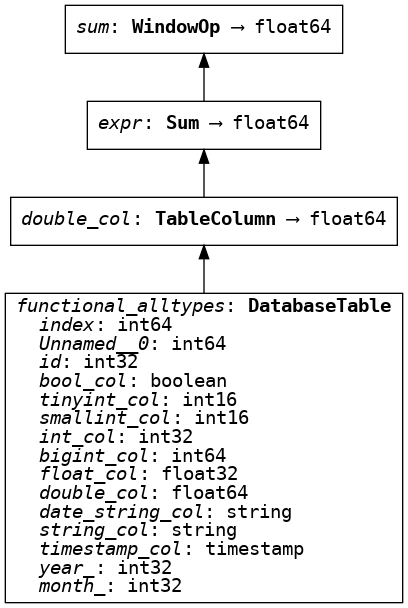

SELECT sum("double_col") OVER (PARTITION BY "string_col" ORDER BY "id") AS tmp
FROM functional_alltypes


0        0.0
1     6767.0
2    13534.0
3    20301.0
4    27068.0
Name: tmp, dtype: float64

In [13]:
expr = t.double_col.sum().over(win)
display(expr)
print(expr.compile())
expr.execute().head(5)